In [31]:
import numpy as np
from scipy.interpolate import interp1d
from simpegEM1D import EM1DAnalytics
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/sgkang/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [32]:
# from sympy import symbols, exp, diff, integrate
# f, t, tau, t0 = sympy.symbols('f, t tau t0')
# f = 1./tau * exp(1./tau*t)
# integrate(f, t) 

In [34]:
def v_step_exp(t, tau=2e-3):
    return 1./tau * np.exp(-t/tau)
def v_ramp_off_exp(t, t0, tau=2e-3):
    return 1./t0 * (- np.exp(-(t+t0)/tau) + np.exp(-(t)/tau))
def v_ramp_off_exp_on(t, t0, tau=2e-3):
    return 1./t0 * (- np.exp(-(t+t0)/tau) + 1.)

In [83]:
time = np.logspace(-6, -3, 31) - 1e-5
t0 = 1e-3
on = v_ramp_off_exp_on(time[time<=0.], t0)
off = v_ramp_off_exp(time[time>0.], t0)

In [84]:
output_fixed_exp_off = np.array([fixed_quad(v_step_exp, t, t+t0)[0] for t in time[time>0.]])/t0
output_fixed_exp_on = np.array([fixed_quad(v_step_exp, 0, t+t0)[0] for t in time[time<=0.]])/t0


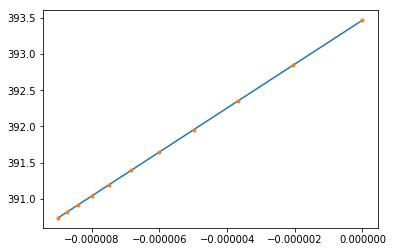

In [85]:
plt.plot(time[time<=0.], on)
plt.plot(time[time<=0.], output_fixed_exp_on, '.')

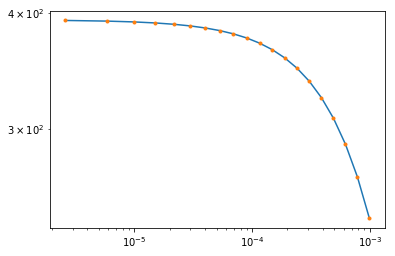

In [87]:
plt.loglog(time[time>0.], off)
plt.loglog(time[time>0.], output_fixed_exp_off, '.')

In [89]:
def v_step_e(t):
    return 1./t
def v_ramp_off_e(t, t0):
    return 1./t0 * np.log((t+t0)/t)

In [90]:
def v_step_l(t):
    return t**(-5./2)
def v_ramp_off_l(t, t0):
    F_t_t0 = 2*t * (1-(1+t0/t)**-1.5) / (3*t0)
    return t**(-5./2) * F_t_t0
def v_step(time):
    return EM1DAnalytics.dBzdtAnalCircT(
    10., time, 1e-1
    )

In [91]:
from scipy.integrate import fixed_quad, quadrature
t0 = 1e-3
time = np.logspace(-6, -2, 41)
output_fixed_exp = np.array([fixed_quad(v_step_exp, t, t+t0)[0] for t in time])

In [92]:
%%time
output_fixed_exp = np.array([fixed_quad(v_step_exp, t, t+t0)[0] for t in time])
output_fixed_exp_on = np.array([fixed_quad(v_step_exp, 0, t)[0] for t in time])
output_fixed_e = np.array([fixed_quad(v_step_e, t, t+t0)[0] for t in time])
output_fixed_l = np.array([fixed_quad(v_step_l, t, t+t0)[0] for t in time])

CPU times: user 3.53 ms, sys: 132 µs, total: 3.67 ms
Wall time: 3.68 ms


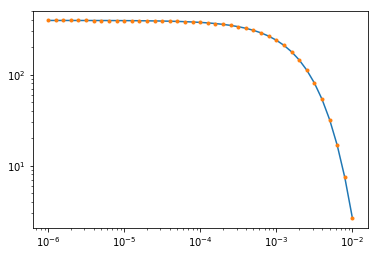

In [93]:
plt.loglog(time, output_fixed_exp/t0)
plt.loglog(time, v_ramp_off_exp(time, t0), '.')

In [94]:
%%time
output_exp = np.array([quadrature(v_step_exp, t, t+t0)[0] for t in time])
output_e = np.array([quadrature(v_step_e, t, t+t0)[0] for t in time])
output_l = np.array([quadrature(v_step_l, t, t+t0)[0] for t in time])

CPU times: user 55.5 ms, sys: 2.7 ms, total: 58.2 ms
Wall time: 59.8 ms


/Users/sgkang/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:201: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.290315e-03
  AccuracyWarning)
/Users/sgkang/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:201: AccuracyWarning: maxiter (50) exceeded. Latest difference = 6.788594e-04
  AccuracyWarning)
/Users/sgkang/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:201: AccuracyWarning: maxiter (50) exceeded. Latest difference = 3.244263e-04
  AccuracyWarning)
/Users/sgkang/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:201: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.392809e-04
  AccuracyWarning)
/Users/sgkang/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:201: AccuracyWarning: maxiter (50) exceeded. Latest difference = 5.305166e-05
  AccuracyWarning)
/Users/sgkang/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:201: AccuracyWarning: m

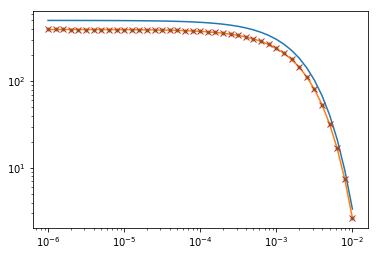

In [95]:
plt.loglog(time, v_step_exp(time))
plt.loglog(time, v_ramp_off_exp(time, 1e-3))
plt.loglog(time, output_exp/t0, '.')
plt.loglog(time, output_fixed_exp/t0, 'x')

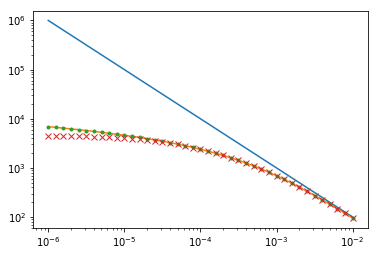

In [96]:
plt.loglog(time, v_step_e(time))
plt.loglog(time, v_ramp_off_e(time, 1e-3))
plt.loglog(time, output_e/t0, '.')
plt.loglog(time, output_fixed_e/t0, 'x')

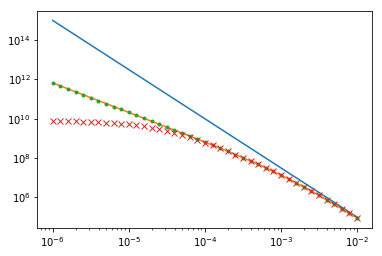

In [97]:
plt.loglog(time, v_step_l(time))
plt.loglog(time, v_ramp_off_l(time, 1e-3))
plt.loglog(time, output_l/t0, '.')
plt.loglog(time, output_fixed_l/t0, 'x')

In [98]:
from simpegEM1D import skytem_HM_2015
wave = skytem_HM_2015()

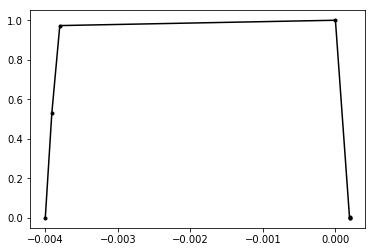

In [99]:
plt.plot(wave.current_times[-7:], wave.currents[-7:], 'k.-')

In [100]:
wave.current_times[-7:].max() * 1e3

0.196368

In [101]:
t0s = np.diff(wave.currents[-7:]) / np.diff(wave.current_times[-7:])
Tp = wave.current_times[-7:].max()-wave.current_times[-7:].min()

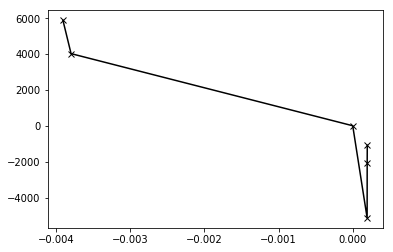

In [102]:
plt.plot(wave.current_times[-7:][1:], t0s, 'kx-')

In [122]:
from scipy.integrate import fixed_quad
step_func = v_step_exp
# T = 1./25.
t_measured = np.logspace(-6, -2, 31)
t_currents = np.r_[0., 0.002, 0.004]
T = t_currents.max()
currents = np.r_[0., 1., 0.]

def piecewise_ramp(step_func, t_measured, t_currents, currents, n=20, eps=1e-10):
    """
    Computes response from piecewise linear current waveform with a single pulse.
    This basically evaluates the convolution between dI/dt and step-off response.
    
    step_func: function handle to evaluate step-off response
    t_measured: time channels when the current is off
    currents: input source currents
    n: Gaussian quadrature order
    """
    dt = np.diff(t_currents)
    dI = np.diff(currents)
    dIdt = dI/dt
    nt = t_currents.size
    response = np.zeros(t_measured.size, dtype=float)
    pulse_time = t_currents.max()
    
    for i in range(1, nt):
        t_lag = pulse_time - t_currents[i]
        time = t_lag + t_measured
        t0 = dt[i-1]
        const = -dIdt[i-1]
        if abs(const) > eps:
            for j, t in enumerate(time):
                # on-time
                if t < t_lag:  
                    response[j] += fixed_quad(step_func, 0, t+t0, n=20)[0] * const
                # off-time                    
                else:                    
                    response[j] += fixed_quad(step_func, t, t+t0, n=20)[0] * const
        
    return response

def double_pulse(step_func, t_measured, t_currents, currents, T, n=20):
    """
    Computes response from double pulses (negative then positive)
    T: Period (e.g. 25 Hz base frequency, 0.04 s period)    
    """
    response_double = (
        piecewise_ramp(step_func, t_measured, t_currents, currents, n=n)
        -piecewise_ramp(step_func, t_measured+T/2., t_currents, currents, n=n) * 0.5
    )
    return response_double

# Test for off-time

In [123]:
t_off = np.logspace(-6, -2, 31)
# single pulse
response_single = piecewise_ramp(v_step_exp, t_off, t_currents, currents)

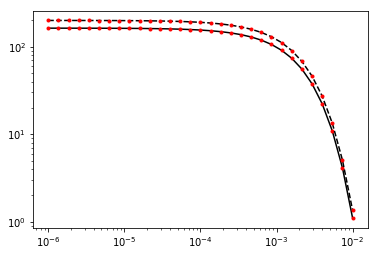

In [119]:
t_off = np.logspace(-6, -2, 31)
# single pulse
response_single = piecewise_ramp(v_step_exp, t_off, t_currents, currents)
response_single_true = v_ramp_off_exp(t_off, 2e-3)-v_ramp_off_exp(t_off+0.002, 2e-3)
# double pulse
response_double = double_pulse(v_step_exp, t_off, t_currents, currents, T)

response_double_true = (
    v_ramp_off_exp(t_off, 2e-3)-v_ramp_off_exp(t_off+0.002, 2e-3)+
    -(v_ramp_off_exp(t_off+T/2., 2e-3)-v_ramp_off_exp(t_off+0.002+T/2, 2e-3)) * 0.5
)
plt.loglog(t_off, response_double, 'k')
plt.loglog(t_off, response_double_true, 'r.')

plt.loglog(t_off, response_single, 'k--')
plt.loglog(t_off, response_single_true, 'r.')

## Test for on-time

In [140]:
time = np.logspace(-6, -3, 33) - 1e-5
response_single = piecewise_ramp(v_step_exp, time, t_currents, currents)
response_single_true_off = (
    v_ramp_off_exp(time[time>0.], 2e-3)-
    v_ramp_off_exp(time[time>0.]+0.002, 2e-3)
)
response_single_true_on = (
    v_ramp_off_exp_on(time[time<=0.], 2e-3)-
    v_ramp_off_exp_on(time[time<=0.]+0.002, 2e-3)
)



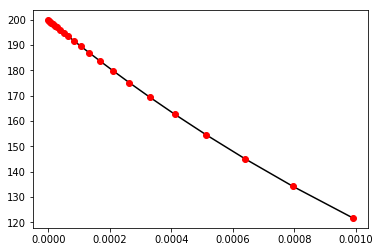

In [141]:
plt.plot(time[time>0.], response_single[time>0.], 'k')
plt.plot(time[time>0.], response_single_true_off, 'ro')


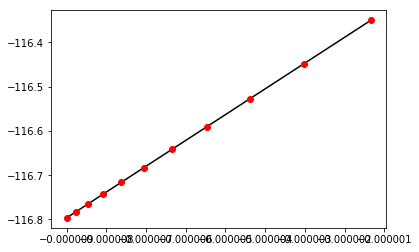

In [142]:
plt.plot(time[time<=0.], response_single[time<=0.], 'k')
plt.plot(time[time<=0.], response_single_true_on, 'ro')

kang
kang
kang
kang
kang
kang
kang
kang
kang
kang
kang
kang


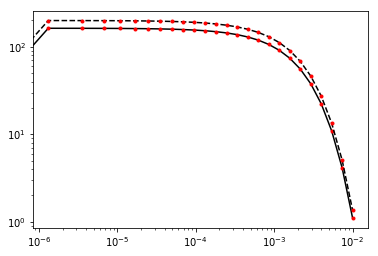

In [30]:
t_off = np.logspace(-6, -2, 31)
# single pulse
response_single = piecewise_ramp(v_step_exp, t_off, t_currents, currents)
response_single_true = v_ramp_off_exp(t_off, 2e-3)-v_ramp_off_exp(t_off+0.002, 2e-3)
# double pulse
response_double = double_pulse(v_step_exp, t_off, t_currents, currents, T)

response_double_true = (
    v_ramp_off_exp(t_off, 2e-3)-v_ramp_off_exp(t_off+0.002, 2e-3)+
    -(v_ramp_off_exp(t_off+T/2., 2e-3)-v_ramp_off_exp(t_off+0.002+T/2, 2e-3)) * 0.5
)
plt.loglog(t_off, response_double, 'k')
plt.loglog(t_off, response_double_true, 'r.')

plt.loglog(t_off, response_single, 'k--')
plt.loglog(t_off, response_single_true, 'r.')

In [76]:
%%time
response_single = piecewise_ramp(v_step_l, t_off, t_currents, currents)

CPU times: user 1.37 ms, sys: 20 µs, total: 1.39 ms
Wall time: 1.38 ms


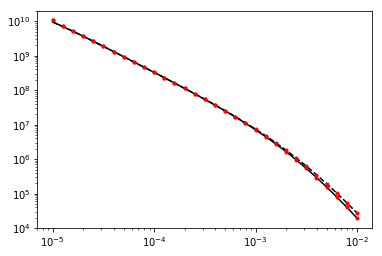

In [23]:
# single pulse
response_single = piecewise_ramp(v_step_l, t_off, t_currents, currents)
response_single_true = v_ramp_off_l(t_off, 2e-3)-v_ramp_off_l(t_off+0.002, 2e-3)
# double pulse
response_double = double_pulse(v_step_l, t_off, t_currents, currents, T)
response_double_true = (
    v_ramp_off_l(t_off, 2e-3)-v_ramp_off_l(t_off+0.002, 2e-3)+
    -(v_ramp_off_l(t_off+T/2., 2e-3)-v_ramp_off_l(t_off+0.002+T/2, 2e-3)) * 0.5
)
plt.loglog(t_off, response_double, 'k')
plt.loglog(t_off, response_double_true, 'r.')

plt.loglog(t_off, response_single, 'k--')
plt.loglog(t_off, response_single_true, 'r.')

In [24]:
%%time
response_single_true = piecewise_ramp(v_step, t_off, t_currents, currents, n=5)

CPU times: user 2.23 ms, sys: 24 µs, total: 2.25 ms
Wall time: 2.25 ms


In [25]:
%%time
response_single_true = piecewise_ramp(v_step, t_off, t_currents, currents, n=20)

CPU times: user 2.73 ms, sys: 67 µs, total: 2.79 ms
Wall time: 2.86 ms


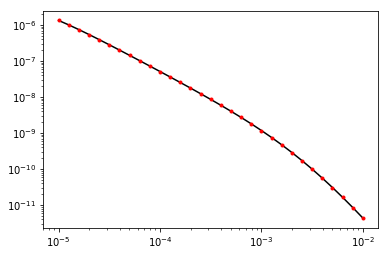

In [26]:
# single pulse
response_single = piecewise_ramp(v_step, t_off, t_currents, currents, n=20)
plt.loglog(t_off, -response_single, 'k')
plt.loglog(t_off, -response_single_true, 'r.')

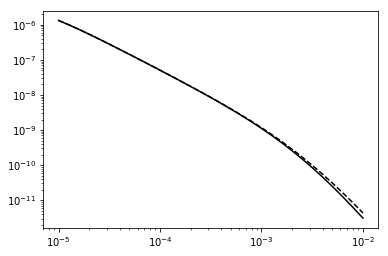

In [27]:
# single pulse
response_single = piecewise_ramp(v_step, t_off, t_currents, currents, n=20)
response_double = double_pulse(v_step, t_off, t_currents, currents, T)
plt.loglog(t_off, -response_single, 'k--')
plt.loglog(t_off, -response_double, 'k')